Q1.	**Apply Kmeans clustering  and show clusters for
    Iris-setosa",  "Iris-versicolor", "Iris-virginica"**


In [ ]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [20]:
iris = datasets.load_iris()

In [21]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [22]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
clust = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
clust_v = pd.DataFrame(iris.target, columns=['Target'])

In [25]:
clust.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
clust_v.head()

,Target
0,0
1,0
2,0
3,0
4,0


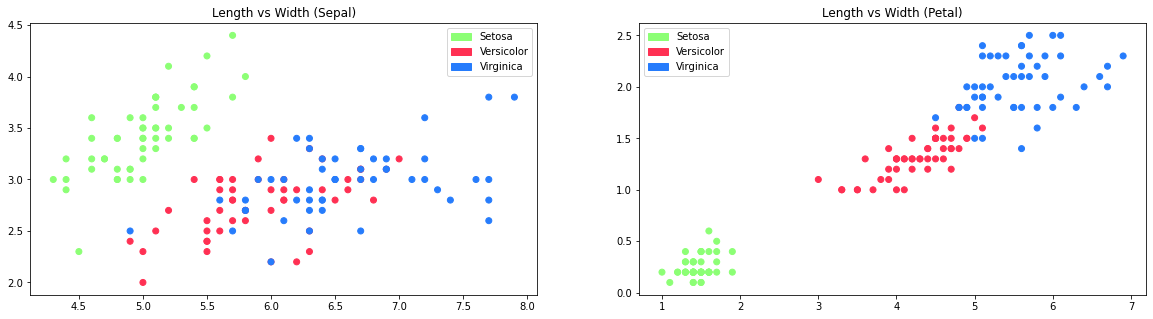

In [31]:
plt.figure(figsize=(20,5))
colors = np.array(['#8cff75', '#ff3053', '#267cfc'])
iris_targets_legend = np.array(iris.target_names)
patch1 = mpatches.Patch(color='#8cff75', label='Setosa')
patch2 = mpatches.Patch(color='#ff3053', label='Versicolor')
patch3 = mpatches.Patch(color='#267cfc', label='Virginica')
plt.subplot(1, 2, 1)
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[y['Target']])
plt.title('Length vs Width (Sepal)')
plt.legend(handles=[patch1, patch2, patch3])
plt.subplot(1,2,2)
plt.scatter(x['Petal Length'], x['Petal Width'], c= colors[y['Target']])
plt.title('Length vs Width (Petal)')
plt.legend(handles=[patch1, patch2, patch3])

In [32]:
iris_kmean= KMeans(n_clusters=3)
iris_kmean.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

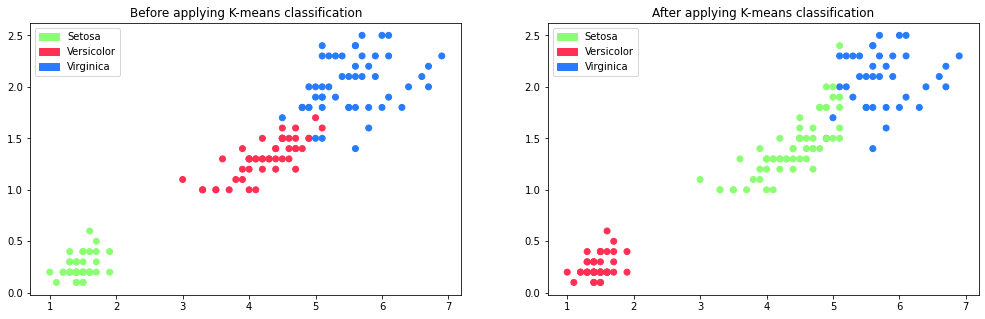

In [37]:
plt.figure(figsize=(17,5))
colors = np.array(['#8cff75', '#ff3053', '#267cfc'])
predictedY = np.choose(iris_kmean.labels_, [1, 0, 2]).astype(np.int64)
plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']])
plt.title('Before applying K-means classification')
plt.legend(handles=[patch1, patch2, patch3])
plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY])
plt.title("After applying K-means classification")
plt.legend(handles=[patch1, patch2, patch3])

In [38]:
sm.accuracy_score(predictedY, y['Target'])

0.24

In [39]:
sm.confusion_matrix(predictedY, y['Target'])

array([[ 0, 48, 14],
       [50,  0,  0],
       [ 0,  2, 36]])

----------------------------------------------------

**Q2. Apply classification for above dataset using KNN**

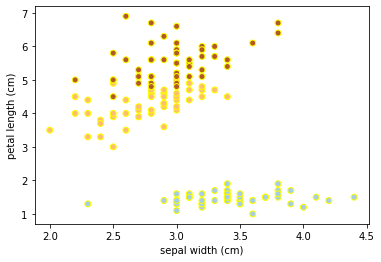

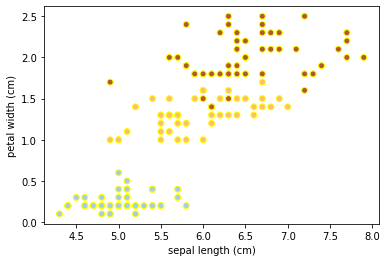

In [50]:

plt.scatter(iris.data[:,1],iris.data[:,2],c=iris.target, cmap=plt.cm.Paired,edgecolors=np.array(['yellow']))
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.show()

plt.scatter(iris.data[:,0],iris.data[:,3],c=iris.target, cmap=plt.cm.Paired,edgecolors=np.array(['yellow']))
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[3])
plt.show()

In [51]:
p = iris.data
q = iris.target
print(p.shape)
print(q.shape)

(150, 4)
(150,)


In [52]:
from sklearn.model_selection import train_test_split
p_train,p_test,q_train,q_test = train_test_split(p,q,test_size=0.2,random_state=4)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(p_train,q_train)
        q_pred=knn.predict(p_test)
        scores[k] = metrics.accuracy_score(q_test,q_pred)
        scores_list.append(metrics.accuracy_score(q_test,q_pred))

Text(0, 0.5, 'Testing Accuracy')

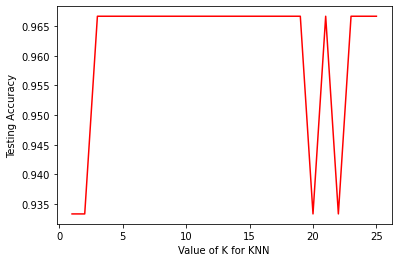

In [57]:
plt.plot(k_range,scores_list,color='red')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [58]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(p,q)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [59]:
#0 = setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor',2:'virginica'}


x_new = [[3,4,5,2],
         [5,4,2,2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa
